In [51]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.ensemble import RandomForestClassifier

In [228]:
test_df = pd.read_csv("./test.csv")
train_df = pd.read_csv("./train.csv")

In [229]:
train_df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [230]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
CREDIT_SCORE,795,9.9
ANNUAL_MILEAGE,782,9.8
ID,0,0.0
MARRIED,0,0.0
PAST_ACCIDENTS,0,0.0


In [231]:
train_df = train_df.drop(['ID', 'RACE', 'POSTAL_CODE'], axis=1)

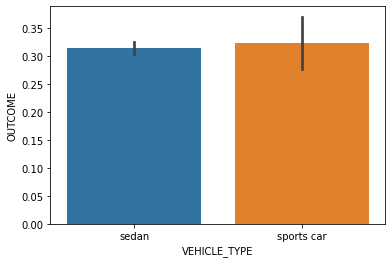

In [232]:
sns.barplot(x='VEHICLE_TYPE', y='OUTCOME', data=train_df)

In [233]:
train_df = train_df.drop(['VEHICLE_TYPE'], axis=1)

In [234]:
data = [train_df, test_df]
mean = train_df["CREDIT_SCORE"].mean()
std = test_df["CREDIT_SCORE"].std()
low = int((mean - std) * 100)
high = int((mean + std) * 100)


for dataset in data:
    mean = train_df["CREDIT_SCORE"].mean()
    std = test_df["CREDIT_SCORE"].std()
    is_null = dataset["CREDIT_SCORE"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_score = np.random.randint(low, high, size = is_null)
    # fill NaN values in Age column with random values generated
    score_slice = dataset["CREDIT_SCORE"].copy()
    score_slice[~np.isnan(score_slice)] = np.multiply(score_slice[~np.isnan(score_slice)], 100)
    score_slice[np.isnan(score_slice)] = rand_score
    dataset["CREDIT_SCORE"] = score_slice
    dataset["CREDIT_SCORE"] = train_df["CREDIT_SCORE"].astype(int)

In [235]:
train_df.head(20)

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,0-9y,high school,upper class,62,1,after 2015,0,1,12000.0,0,0,0,0
1,16-25,male,0-9y,none,poverty,35,0,before 2015,0,0,16000.0,0,0,0,1
2,16-25,female,0-9y,high school,working class,49,1,before 2015,0,0,11000.0,0,0,0,0
3,16-25,male,0-9y,university,working class,20,1,before 2015,0,1,11000.0,0,0,0,0
4,26-39,male,10-19y,none,working class,38,1,before 2015,0,0,12000.0,2,0,1,1
5,40-64,female,20-29y,high school,upper class,61,1,after 2015,0,1,13000.0,3,0,3,0
6,65+,male,30y+,high school,upper class,49,0,after 2015,1,1,13000.0,7,0,3,0
7,26-39,female,0-9y,university,working class,46,0,after 2015,0,1,14000.0,0,0,0,1
8,40-64,female,20-29y,university,working class,52,0,before 2015,1,0,13000.0,0,0,0,0
9,40-64,female,0-9y,high school,upper class,56,1,before 2015,0,1,11000.0,0,0,0,1


In [236]:
data = [train_df, test_df]
mean = train_df["ANNUAL_MILEAGE"].mean()
std = test_df["ANNUAL_MILEAGE"].std()
for dataset in data:
    mean = train_df["ANNUAL_MILEAGE"].mean()
    std = test_df["ANNUAL_MILEAGE"].std()
    is_null = dataset["ANNUAL_MILEAGE"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_mileage = np.random.uniform(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    mileage_slice = dataset["ANNUAL_MILEAGE"].copy()
    mileage_slice[np.isnan(mileage_slice)] = rand_mileage
    dataset["ANNUAL_MILEAGE"] = mileage_slice
    dataset["ANNUAL_MILEAGE"] = train_df["ANNUAL_MILEAGE"].astype(int)

In [237]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE                  7998 non-null   object
 1   GENDER               7998 non-null   object
 2   DRIVING_EXPERIENCE   7998 non-null   object
 3   EDUCATION            7998 non-null   object
 4   INCOME               7998 non-null   object
 5   CREDIT_SCORE         7998 non-null   int64 
 6   VEHICLE_OWNERSHIP    7998 non-null   int64 
 7   VEHICLE_YEAR         7998 non-null   object
 8   MARRIED              7998 non-null   int64 
 9   CHILDREN             7998 non-null   int64 
 10  ANNUAL_MILEAGE       7998 non-null   int64 
 11  SPEEDING_VIOLATIONS  7998 non-null   int64 
 12  DUIS                 7998 non-null   int64 
 13  PAST_ACCIDENTS       7998 non-null   int64 
 14  OUTCOME              7998 non-null   int64 
dtypes: int64(9), object(6)
memory usage: 937.4+ KB


In [238]:
train_df['VEHICLE_YEAR'].describe()

count            7998
unique              2
top       before 2015
freq             5601
Name: VEHICLE_YEAR, dtype: object

In [239]:
years = {"before 2015": 0, "after 2015": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['VEHICLE_YEAR'] = dataset['VEHICLE_YEAR'].map(years)

In [240]:
incomes = {"poverty": 0, "working class": 1, "middle class": 2, "upper class": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['INCOME'] = dataset['INCOME'].map(incomes)

In [241]:
educations = {"none": 0, "high school": 1, "university": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['EDUCATION'] = dataset['EDUCATION'].map(educations)

In [242]:
experiences = {"0-9y": 0, "10-19y": 1, "20-29y": 2, "30y+": 3}
data = [train_df, test_df]

for dataset in data:
    dataset['DRIVING_EXPERIENCE'] = dataset['DRIVING_EXPERIENCE'].map(experiences)

In [243]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['GENDER'] = dataset['GENDER'].map(genders)

In [244]:
ages = {"16-25": 0, "26-39": 1, "40-64": 2, "65+": 3}
data = [train_df, test_df]

for dataset in data:
    dataset['AGE'] = dataset['AGE'].map(ages)

In [245]:
test_df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,123150,3,1,majority,3,2,2,62,1,1,1,1,10238,12000,sedan,4,2,1,0
1,564890,2,1,majority,1,0,1,35,1,0,0,1,32765,16000,sedan,2,1,1,0
2,299429,1,1,majority,0,2,2,49,1,1,0,1,10238,11000,sedan,0,0,0,0
3,949426,1,0,majority,1,1,2,20,1,1,1,1,10238,11000,sedan,0,0,0,0
4,455304,2,0,majority,1,1,2,38,0,0,1,0,10238,12000,sedan,3,0,1,0


In [246]:
X_train = train_df.drop("OUTCOME", axis=1)
Y_train = train_df["OUTCOME"]
X_test  = test_df.drop(["ID", "RACE", "VEHICLE_TYPE", "POSTAL_CODE", "VEHICLE_TYPE", "OUTCOME"], axis=1).copy()

In [247]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)
print(Y_prediction)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

[0 0 0 ... 1 0 0]
99.71 %


In [248]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [249]:
importances.head(15)

,importance
feature,
CREDIT_SCORE,0.191
DRIVING_EXPERIENCE,0.138
ANNUAL_MILEAGE,0.136
AGE,0.087
VEHICLE_OWNERSHIP,0.078
SPEEDING_VIOLATIONS,0.067
VEHICLE_YEAR,0.059
PAST_ACCIDENTS,0.057
INCOME,0.052


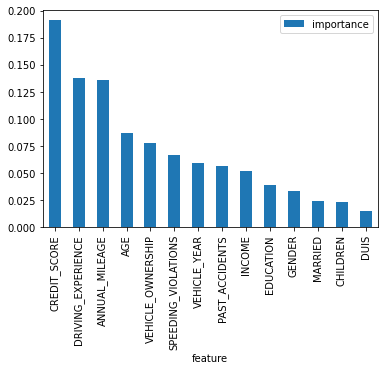

In [250]:
importances.plot.bar()

In [251]:
train_df  = train_df.drop(["DUIS", "CHILDREN", "MARRIED"], axis=1)
test_df  = test_df.drop(["DUIS", "CHILDREN", "MARRIED"], axis=1)

In [252]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.71 %


In [253]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.77 %


In [254]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[4876,  605],
       [ 827, 1690]])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [255]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7024106400665004

In [257]:
submission = pd.DataFrame({
        "ID": test_df["ID"],
        "OUTCOME": Y_prediction
    })
submission.to_csv('submission.csv', index=False)